# London House Pricing Insights

### Questions;
1. Does the tenure of a property impact the property price?
2. Do the number of bedrooms or the number of bathrooms have a bigger impact on property price?
3. How impactful is proximity to the nearest station on property price?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('london_house_prices.csv')
df.head()

,id,bedrooms,bathrooms,tenure,garden,street,size_sqft,price_pounds,nearest_station_name,nearest_station_miles,postcode_outer
0,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",NaN,10500000,Holland Park Station,0.2,NaN
1,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",NaN,8950000,Wimbledon Station,0.3,SW19
2,134169233,7.0,5.0,freehold,1,"Southside Common, Wimbledon Village, SW19",NaN,11950000,Wimbledon Station,0.7,SW19
3,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",NaN,10500000,Holland Park Station,0.2,NaN
4,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",NaN,8950000,Wimbledon Station,0.3,SW19


In [3]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print(num_rows, num_cols)

934 11


934 rows, 11 columns in the dataset

In [4]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
print(no_nulls)

{'nearest_station_name', 'price_pounds', 'garden', 'id', 'street', 'nearest_station_miles'}


The columns; street, price_pounds, nearest_station_name, id, garden, nearest_station_miles all have no missing values

In [5]:
nulls = set(df.columns[df.isnull().mean()>0]) #Which columns have missing values present
print(nulls)

{'size_sqft', 'bedrooms', 'postcode_outer', 'tenure', 'bathrooms'}


The columns; bathrooms, size_sqft, bedrooms, tenure, and postcode_outer have missing values

In [6]:
size_sqft_nulls = df.size_sqft.isnull().mean()
print(size_sqft_nulls)

0.5535331905781584


55% of sqft values are missing

In [7]:
size_bathrooms_nulls = df.bathrooms.isnull().mean()
print(size_bathrooms_nulls)

0.03747323340471092


3.7% of bathroom values are missing

In [8]:
size_bedroom_nulls  = df.bedrooms.isnull().mean()
print(size_bedroom_nulls)

0.016059957173447537


1.6% of bedroom values missing

In [9]:
tenure_value_nulls = df.tenure.isnull().mean()
print(tenure_value_nulls)

0.01284796573875803


1.2% of tenure values missing

In [10]:
pc_outer_nulls = df.postcode_outer.isnull().mean()
print(pc_outer_nulls)

0.14668094218415417


14.6% of outer postcodes are missing

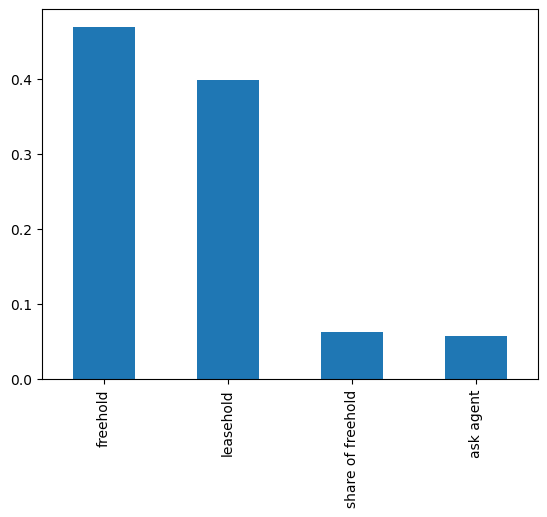

In [11]:
tenure_vals = df.tenure.value_counts()
(tenure_vals/df.shape[0]).plot(kind="bar");

In [12]:
station_vals = df.nearest_station_name.value_counts()
print(station_vals);

Knightsbridge Station             78
Bond Street Station               64
Sloane Square Station             54
South Kensington Station          48
High Street Kensington Station    40
                                  ..
Goodge Street Station              1
Putney Station                     1
Caterham Station                   1
Temple Station                     1
Kilburn Park Station               1
Name: nearest_station_name, Length: 146, dtype: int64


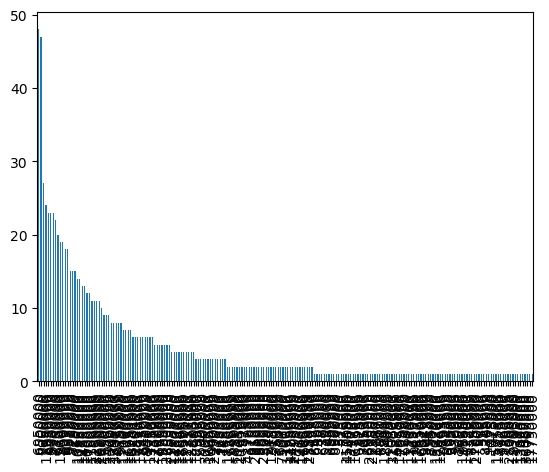

In [13]:
house_price = df.price_pounds.value_counts()
(house_price).plot(kind="bar");

In [14]:
price_pounds_range = df.price_pounds.max()-df.price_pounds.min()
print(price_pounds_range)

74800000


Removing null values
- Removing SQFT column as it is a high % of nulls (55%)
- Removing postcode column due to nulls unable to be inferred
- 

In [15]:
df_clean = df.drop(['size_sqft','postcode_outer'],axis=1)
df_clean.head()

,id,bedrooms,bathrooms,tenure,garden,street,price_pounds,nearest_station_name,nearest_station_miles
0,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",10500000,Holland Park Station,0.2
1,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",8950000,Wimbledon Station,0.3
2,134169233,7.0,5.0,freehold,1,"Southside Common, Wimbledon Village, SW19",11950000,Wimbledon Station,0.7
3,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",10500000,Holland Park Station,0.2
4,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",8950000,Wimbledon Station,0.3


removing rows with nulls in bedrooms, bathrooms, tenure

In [16]:
df_clean = df_clean.dropna(subset=['bedrooms','bathrooms','tenure'])
df_clean.head()

,id,bedrooms,bathrooms,tenure,garden,street,price_pounds,nearest_station_name,nearest_station_miles
0,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",10500000,Holland Park Station,0.2
1,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",8950000,Wimbledon Station,0.3
2,134169233,7.0,5.0,freehold,1,"Southside Common, Wimbledon Village, SW19",11950000,Wimbledon Station,0.7
3,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",10500000,Holland Park Station,0.2
4,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",8950000,Wimbledon Station,0.3


removing street and nearest_station_name as not needed for analysis

In [17]:
df_clean = df_clean.drop(['street','nearest_station_name'],axis=1)
df_clean.head()

,id,bedrooms,bathrooms,tenure,garden,price_pounds,nearest_station_miles
0,132180206,5.0,4.0,freehold,0,10500000,0.2
1,134996630,6.0,5.0,freehold,0,8950000,0.3
2,134169233,7.0,5.0,freehold,1,11950000,0.7
3,132180206,5.0,4.0,freehold,0,10500000,0.2
4,134996630,6.0,5.0,freehold,0,8950000,0.3


In [18]:
num_rows = df_clean.shape[0] #Provide the number of rows in the dataset
num_cols = df_clean.shape[1] #Provide the number of columns in the dataset
print(num_rows, num_cols)

889 7


Categorical variables

In [19]:
cat_var = df_clean.select_dtypes(include=object)
cat_var.head()

,tenure
0,freehold
1,freehold
2,freehold
3,freehold
4,freehold


Create Dummy Variables 

In [20]:
#Pull a list of the column names of the categorical variables
cat_cols = cat_var.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [21]:
df_new = create_dummy_df(df_clean, cat_cols, dummy_na=False) #Use your newly created function
df_new.head()

,id,bedrooms,bathrooms,garden,price_pounds,nearest_station_miles,tenure_freehold,tenure_leasehold,tenure_share of freehold
0,132180206,5.0,4.0,0,10500000,0.2,1,0,0
1,134996630,6.0,5.0,0,8950000,0.3,1,0,0
2,134169233,7.0,5.0,1,11950000,0.7,1,0,0
3,132180206,5.0,4.0,0,10500000,0.2,1,0,0
4,134996630,6.0,5.0,0,8950000,0.3,1,0,0


create the X (explanatory matrix) and y (response vector) to be used in the model.

In [22]:
y = df_new['price_pounds']
X = df_new.drop(['price_pounds'],axis=1)

In [23]:
#Splitting into groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [24]:
lm_model = LinearRegression() 


In [25]:
lm_model.fit(X_train, y_train) 

LinearRegression()

In [26]:
lm_model.score(X_train, y_train, sample_weight=None)

0.29117835572873874

In [27]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50]

In [28]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [29]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression()
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

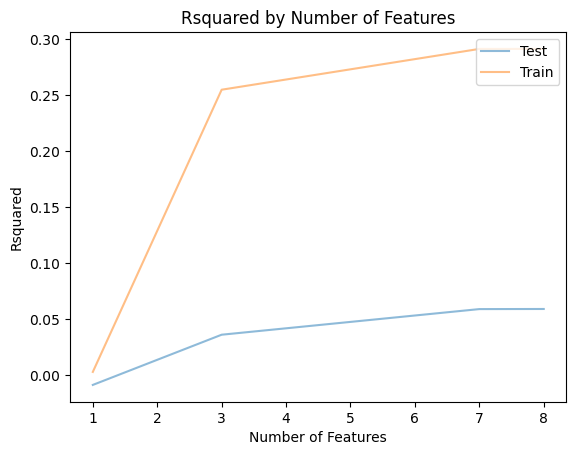

([-0.008961634430582066,
  0.03589143345198709,
  0.03589143345198709,
  0.03589143345198709,
  0.05877222482663358,
  0.058871073345487024],
 [0.002659343953315463,
  0.25474194987119647,
  0.25474194987119647,
  0.25474194987119647,
  0.29117816796181917,
  0.29117835572873874],
 LinearRegression(),
             id  bedrooms  bathrooms  garden  nearest_station_miles  \
 506  136265114       3.0        3.0       0                    0.2   
 307  132138446       5.0        5.0       0                    0.3   
 177  132144443       6.0        7.0       0                    0.3   
 469  111896183       4.0        5.0       1                    0.2   
 376  132071141       5.0        5.0       1                    0.2   
 ..         ...       ...        ...     ...                    ...   
 110  130686101       2.0        2.0       1                    0.3   
 285  132946886       3.0        3.0       0                    0.1   
 903  133195610       5.0        5.0       2              

In [30]:
find_optimal_lm_mod(X, y, cutoffs)

In [31]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
4,nearest_station_miles,-3.279848e+06,3.279848e+06
2,bathrooms,1.847785e+06,1.847785e+06
5,tenure_freehold,-1.166873e+06,1.166873e+06
1,bedrooms,4.163300e+05,4.163300e+05
6,tenure_leasehold,3.823764e+05,3.823764e+05
3,garden,-3.345688e+05,3.345688e+05
7,tenure_share of freehold,-1.818638e+04,1.818638e+04
0,id,2.932686e-02,2.932686e-02


**Question 1 - Does the tenure of a property impact the property price?** - *Answer; Yes it does and being a 'leasehold' had the biggest impact on price out of the 3 tenure options*

**Question 2 - Do the number of bedrooms or the number of bathrooms have a bigger impact on property price?** - *Answer; As seen in the coeffecients, bedrooms have more significant impact on property price than bathrooms*

**Question 3 - How impactful is proximity to the nearest station on property price?** Answer; *Proximity to the nearest station is quite impactful on price. The coefficents demonstrate that this is more impactful than number of bathrooms.*